<a href="https://colab.research.google.com/github/miafontana-ship-it/capstone-project/blob/main/Olympics_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Olympics & Sports Betting
**Data Analytics Capstone Project**

In recent years, sports betting has grown rapidly, and bettors are constantly searching for new ways to predict outcomes and improve their chances of winning. In this project, I use 120 years of Olympic Games data to identify which countries perform best, which sports they tend to excel in, and whether any patterns emerge that could inform betting strategies for the 2020 Olympic Games.

For the purposes of this analysis, I assume we are in 2019 and are using historical Olympic performance to place strategic bets on the upcoming 2020 Games.


I use the [olympics dataset](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) from kaggle, and decided to merge it with the country wise [gdp](https://www.kaggle.com/resulcaliskan/countries-gdps) and [population data](https://www.kaggle.com/centurion1986/countries-population).

Later we will look at [2020 Olympics](https://www.opendatabay.com/data/dataset/aa81f47e-061c-4de6-b711-9426187d9e1a) to see if our predictions where indeed correct.



##Stakeholders

In the context of using 120 years of Olympic historical data to inform strategic betting decisions for the 2020 Games, the following stakeholders are most directly impacted by the insights generated from this analysis:

**1. Sports Bettors (Primary Stakeholder)**

Sports bettors represent the main stakeholder, as they experience the highest level of uncertainty and financial risk when placing Olympic wagers. Their pain point lies in the difficulty of making informed predictions due to irregular event schedules, evolving global competition, and limited public analytics compared with major leagues like the NFL or NBA. This project aims to reduce that uncertainty by identifying long-term patterns in country and sport performance, enabling bettors to make more data-driven decisions.

**2. Sportsbooks / Betting Companies**

Sportsbooks benefit from improved forecasting models and deeper understanding of historical patterns, which help them set more accurate and competitive odds. Analytical insight from this project can help refine risk management and odds calibration.

**3. Sports Analysts and Data Strategists**

Analysts who cover the Olympics (including broadcasters, journalists, or performance researchers) can use long-term metrics to contextualize expected outcomes. They aim to explain why certain countries or sports remain dominant and identify which trends may be shifting heading into 2020. This analysis provides a structured, historically grounded framework for those interpretations.

##Olympics Data

In [ ]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import os
os.listdir()


['.config',
 'w_gdp.xls',
 'athlete_events.csv',
 'noc_regions.csv',
 'WorldPopulation 2.csv',
 'GDP.csv',
 'sample_data']

In [106]:
import pandas as pd

df_athletes = pd.read_csv("/content/athlete_events.csv")
df_regions = pd.read_csv("/content/noc_regions.csv")
df_gdp = pd.read_csv("/content/GDP.csv")
df_pop = pd.read_csv("/content/World_Population.csv")

df_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


##Modern Data Stack Summary

For this project, all of my data transformations are done in Google Colab using Python and pandas. I load the raw CSV files, clean them, merge the Olympic, GDP, and population datasets, filter years, and create new features such as corrected medal counts. Colab works well for this because the datasets are small, easy to handle in memory, and simple to explore interactively.

I am not using BigQuery because the scale of this project does not require a cloud data warehouse. Setting up BigQuery, loading tables, writing SQL transformations, and managing permissions would add unnecessary complexity. Pandas in Colab lets me work faster and focus on the analysis instead of the infrastructure.

If this were a real production environment, such as working for a sports analytics or sports betting company, the setup would likely look different. A warehouse like BigQuery or Snowflake would store large datasets, dbt could manage SQL transformations, and dashboards would be built on top of curated tables. For this project, I will instead use Tableau as my BI tool to create visualizations and publish insights. I will also use GitHub to store my code and cleaned datasets.

The modeling I perform is analytical rather than machine learning. I focus on understanding patterns in Olympic performance, such as medal trends, country comparisons, and relationships with GDP and population. These insights support how one might think about sports-betting predictions for future Olympics.

##Cleaning and Merging Data

The first five rows of the olympics data are shown below. There are have 271,116 rows and 15 columns. Columns include Name, Sex, Age, Height, Weight of the athlete, their team name, sport, event and the year, season, city of the olympics he/she took part in. In addition, the data captures the medal won (if any) by the athlete.

In [155]:
# Read in the data set
olympics = pd.read_csv('athlete_events.csv')
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


#### 1) Missing Values
Printing column wise missing values...

In [156]:
print(olympics.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


We find that height, weight and age have a lot of missing values.

Medals have a NaN in about 231,333 rows as not all participating athletes win medals. Let's replace these missing values with 'Did not win' or 'DNW'

In [ ]:
olympics['Medal'].fillna('DNW', inplace = True)

/tmp/ipython-input-2160398606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olympics['Medal'].fillna('DNW', inplace = True)


In [ ]:
# As expected the NaNs in the 'Medal' column disappear!
print(olympics.isnull().sum())

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


#### 2) NOC - National Olympic Committee.
These are responsible for organizing their people's participation in the Olympics.
Are all NOCs linked to a unique team? We can find this out by taking a unique subset of just the NOC and team columns and taking a value count.

In [ ]:
print(olympics.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

NOC
FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: count, dtype: int64


Use the noc_regions.csv to correct this by aligning NOC with each country

The NOC data has the NOC code and the corresponding Country Name.

In [ ]:
# noc_country mapping
noc_country = pd.read_csv('noc_regions.csv')
noc_country.drop('notes', axis = 1 , inplace = True)
noc_country.rename(columns = {'region':'Country'}, inplace = True)

noc_country.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


Merge the original dataset with the NOC master using the **NOC code as the primary key**. (This will be a left join since we want all participating countries to remain in the data even if their NOC-Country is not found in the master).

In [ ]:
# merging
olympics_merge = olympics.merge(noc_country,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')

We still have NOCs that didn't have a matching country in the noc_region.csv

In [ ]:
olympics_merge.loc[olympics_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


Manually insert the correct values.

    1. SGP - Singapore
    2. ROT - Refugee Olympic Athletes
    3. UNK - Unknown
    4. TUV - Tuvalu

In [ ]:

import numpy as np

# Make sure we have a Country column first
if 'Country' not in olympics_merge.columns:
    # Most likely it is called 'region' after the merge with noc_country
    if 'region' in olympics_merge.columns:
        olympics_merge['Country'] = olympics_merge['region']
    # if not, just copy from Team
    elif 'Team' in olympics_merge.columns:
        olympics_merge['Country'] = olympics_merge['Team']
    else:
        print("Available columns:", olympics_merge.columns.tolist())
        raise KeyError("No Country-like column found to start from.")

# Fix special NOC codes
olympics_merge.loc[olympics_merge['NOC'] == 'SGP', 'Country'] = 'Singapore'
olympics_merge.loc[olympics_merge['NOC'] == 'ROT', 'Country'] = 'Refugee Olympic Athletes'
olympics_merge.loc[olympics_merge['NOC'] == 'UNK', 'Country'] = 'Unknown'
olympics_merge.loc[olympics_merge['NOC'] == 'TUV', 'Country'] = 'Tuvalu'

# Put these values from Country into Team (final column)
if 'Team' in olympics_merge.columns:
    olympics_merge['Team'] = np.where(
        olympics_merge['Team'].isna(),
        olympics_merge['Country'],
        olympics_merge['Team']
    )
else:
    # Otherwise, just rename Country -> Team
    olympics_merge.rename(columns={'Country': 'Team'}, inplace=True)

olympics_merge.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Country Code
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,CHN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,CHN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,DNK
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NLD


### Merge GDP data
By merging GDP data to the tabel, this allows us to better see if there is a correlation between GDP and metal count per country.

In [ ]:
w_gdp = pd.read_csv('GDP.csv', skiprows=3)
# Remove unnecessary columns
if 'Indicator Name' in w_gdp.columns and 'Indicator Code' in w_gdp.columns:
    w_gdp.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)

# The columns are the years GDP has been recorded.
v_gdp = pd.melt(
    w_gdp,
    id_vars=['Country Name', 'Country Code'],
    var_name='Year',
    value_name='GDP'
)

# convert the year column to numeric
v_gdp['Year'] = pd.to_numeric(v_gdp['Year'])

v_gdp.head()

,Country Name,Country Code,Year,GDP
0,Afghanistan,AFG,1960,5.377778e+08
1,Albania,ALB,1960,NaN
2,Algeria,DZA,1960,2.723649e+09
3,American Samoa,ASM,1960,NaN
4,Andorra,AND,1960,NaN


In [ ]:
olympics_merge_gdp = olympics_merge.merge(
    v_gdp[['Country Code', 'Year', 'GDP']],
    left_on=['NOC', 'Year'],
    right_on=['Country Code', 'Year'],
    how='left'
)

olympics_merge_gdp = olympics_merge_gdp.drop(columns=['Country Code_x', 'Country Code_y'])

olympics_merge_gdp.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,4.269157e+11
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,8.560547e+12
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN


### Merge Population Data
Population is also of import when looking at a countries performance.

1. Higher populations mean a bigger talent pool to choose from
2. Its not GDP alone but GDP per capita that decides how much resources a country has.

In [110]:
import pandas as pd

pop_raw = pd.read_csv("World_Population.csv")
pop_raw.head()

# Identify year columns
year_cols = [col for col in pop_raw.columns if col.isdigit()]

pop_long = pop_raw.melt(
    id_vars=["Country", "Country Code"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Population"
)

# Convert year to numeric
pop_long["Year"] = pd.to_numeric(pop_long["Year"])
pop_long["Population"] = pd.to_numeric(pop_long["Population"], errors="coerce")

pop_long.head()


,Country,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0


Merging country population based on the year each athlete performed

In [118]:
athletes = olympics_merge_gdp

olympics_merge_pop = athletes.merge(
    pop_long[["Country Code", "Year", "Population"]],
    left_on=["NOC", "Year"],
    right_on=["Country Code", "Year"],
    how="left"
)

olympics_merge_pop = olympics_merge_pop.drop(
    columns=[col for col in olympics_merge_pop.columns if col.startswith("Country Code")]
)

olympics_merge_pop.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,4.269157e+11,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,8.560547e+12,1.350695e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN,NaN


Lets focus on data only from 1960 onward as the GDP data does not go back to the begining of the Olympics.



In [119]:
olympics_merge_pop

olympics_clean = olympics_merge_pop[olympics_merge_pop['Year'] >= 1960].copy()

olympics_clean.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,4.269157e+11,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,8.560547e+12,1.350695e+09
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands,NaN,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN,NaN




### Exploratory Data Analysis

Who has the most medals across all editions of the olympics?

We can create a column that captures whether or not a medal was won. It would be 1 if Medal column says Gold, Silver or Bronze and 0 otherwise.

In [124]:
olympics_clean['Medal_Won'] = (olympics_clean['Medal'] != 'DNW').astype(int)
olympics_clean.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,GDP,Population,Medal_Won
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,4.269157e+11,1.164970e+09,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,8.560547e+12,1.350695e+09,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN,NaN,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands,NaN,NaN,0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN,NaN,0


####If a team wins more than one gold medal for an event in an edition of the olympics, then that event is a team event. Lets account for team sports.


In [129]:
identify_team_events = pd.pivot_table(
    olympics_clean,
    index=['Team', 'Year', 'Event'],
    columns='Medal',
    values='Medal_Won',
    aggfunc='sum',
    fill_value=0
).drop('DNW', axis=1).reset_index()

identify_team_events = identify_team_events.loc[identify_team_events['Gold'] > 1, :]
team_sports = identify_team_events['Event'].unique()


The list below gives names of each event where in a single edition multiple golds were given. Although these are ecognised as team events, they are not actually team events.
    1. Gymnastics Women's Balance Beam
    2. Gymnastics Men's Horizontal Bar
    3. Swimming Women's 100 metres Freestyle
    4. Swimming Men's 50 metres Freestyle

These are actually single events but because two athletes had the same score/time, both were awarded the gold medal. We need to remove these events from the list of team sports

In [130]:
remove_sports = ["Gymnastics Women's Balance Beam", "Gymnastics Men's Horizontal Bar",
                 "Swimming Women's 100 metres Freestyle", "Swimming Men's 50 metres Freestyle"]

team_sports = list(set(team_sports) - set(remove_sports))

The next thing we need to do is add a column in the dataset that correctly identifies whether the event in the given record is a team event or a single event. We then use this column to correctly calculate the medal tally for each country.

In [136]:
# if an event name matches one in team_sports, then it is a team event
team_event_mask = olympics_clean['Event'].isin(team_sports)
single_event_mask = ~team_event_mask   # everything else is a single event

# rows where a medal was won
medal_mask = olympics_clean['Medal_Won'] == 1

# 1 under team event if medal is won and event is in team event list
olympics_clean['Team_Event'] = np.where(team_event_mask & medal_mask, 1, 0)

# 1 under singles event if medal is won and event not in team event list
olympics_clean['Single_Event'] = np.where(single_event_mask & medal_mask, 1, 0)

# Optional: combined identifier for category (0 = no medal, 1 = single, 1 = team)
olympics_clean['Event_Category'] = (
    olympics_clean['Single_Event'] + olympics_clean['Team_Event']
)


Calculate medal tally agnostic of the team size - one gold means one gold for an event. To do this we divide the number of medals by the count of winning team members. How do we get the team members? Sum of event_category column should do that for us!

In [140]:
medal_tally_agnostic = olympics_clean \
    .groupby(['Year', 'Team', 'Event', 'Medal'])[['Medal_Won', 'Event_Category']] \
    .agg('sum') \
    .reset_index()

# One medal per event, regardless of team size
medal_tally_agnostic['Medal_Won_Corrected'] = (
    medal_tally_agnostic['Medal_Won'] / medal_tally_agnostic['Event_Category']
)

medal_tally_agnostic[medal_tally_agnostic['Medal_Won'] > 0].head(20)


,Year,Team,Event,Medal,Medal_Won,Event_Category,Medal_Won_Corrected
32,1960,Argentina,Boxing Men's Lightweight,Bronze,1,1,1.0
85,1960,Australia,"Athletics Men's 1,500 metres",Gold,1,1,1.0
86,1960,Australia,"Athletics Men's 10,000 metres",Bronze,1,1,1.0
91,1960,Australia,Athletics Men's 20 kilometres Walk,Silver,1,1,1.0
108,1960,Australia,Athletics Women's 800 metres,Silver,1,1,1.0
112,1960,Australia,Boxing Men's Bantamweight,Bronze,1,1,1.0
116,1960,Australia,Boxing Men's Light-Heavyweight,Bronze,1,1,1.0
140,1960,Australia,"Equestrianism Men's Three-Day Event, Individual",Gold,1,1,1.0
141,1960,Australia,"Equestrianism Men's Three-Day Event, Individual",Silver,1,1,1.0
142,1960,Australia,"Equestrianism Men's Three-Day Event, Team",Gold,4,4,1.0


Who are the greatest olympics playing nations of all time?

Total medal tally of the top 5 countries from 1964 to 2016!

In [147]:
medal_tally = medal_tally_agnostic.groupby(['Year','Team'])['Medal_Won_Corrected'] \
    .agg('sum').reset_index()

medal_tally_pivot = pd.pivot_table(
    medal_tally,
    index='Team',
    columns='Year',
    values='Medal_Won_Corrected',
    aggfunc='sum',
    margins=True   # adds the 'All' total column
).sort_values('All', ascending=False)[1:6]  # drop the first row if it's 'All'

medal_tally_pivot['All']

,All
Team,
United States,1638.0
Soviet Union,989.0
Germany,643.0
Russia,554.0
China,551.0


**USA, Russia, Germany** and **China** are the best countries of all time when it comes to medal tallies from 1964 to 2016. What do the yearwise medal tallies look like?

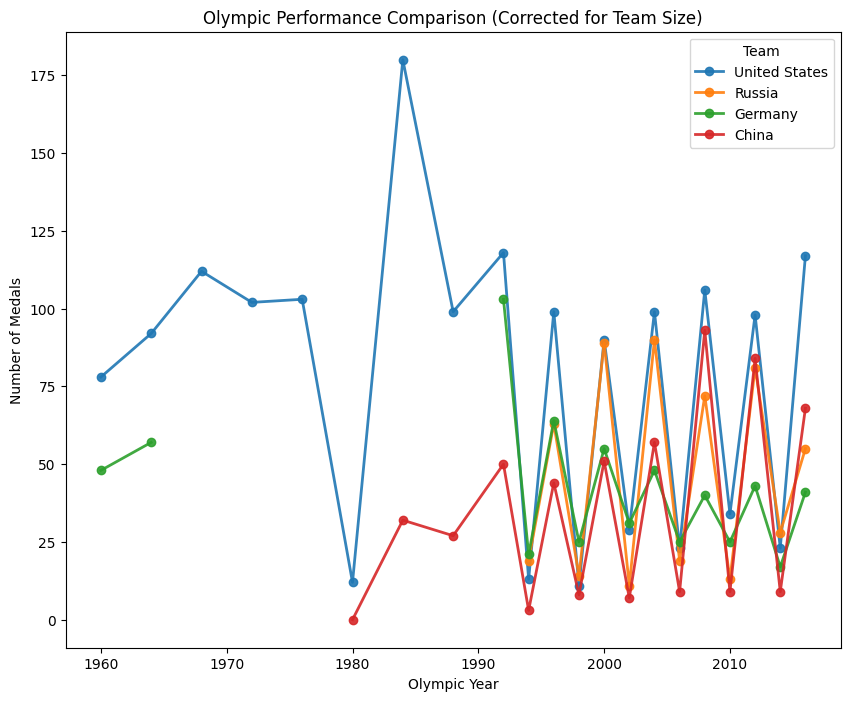

In [151]:
import matplotlib.pyplot as plt

ax = year_team_medals.plot(
    linestyle='-',
    marker='o',
    alpha=0.9,
    figsize=(10,8),
    linewidth=2
)

plt.xlabel('Olympic Year')
plt.ylabel('Number of Medals')
plt.title('Olympic Performance Comparison (Corrected for Team Size)')

plt.show()



###Notes:

**Insight 1**: The drastic spikes are indicative of summer vs winter olympics as summer has more sports that are competing as oppoed to winter sport.

**Insight 2**: The Soviet Union (pre-1991) is not included here. Russia only appears as a competing NOC after 1996.

**Insight 3**: China did not win in the olympics till 1984 and it has shown excellent performance since then.

**Insight 4**: Germany shows sharp discontinuities due to geopolitical history. Before 1990, medals belonged to East and West Germany separately. After reunification, German medal totals jump and stabilize.

#### Lets plot a breakup of medal tally by the medal type - Gold, Silver, Bronze

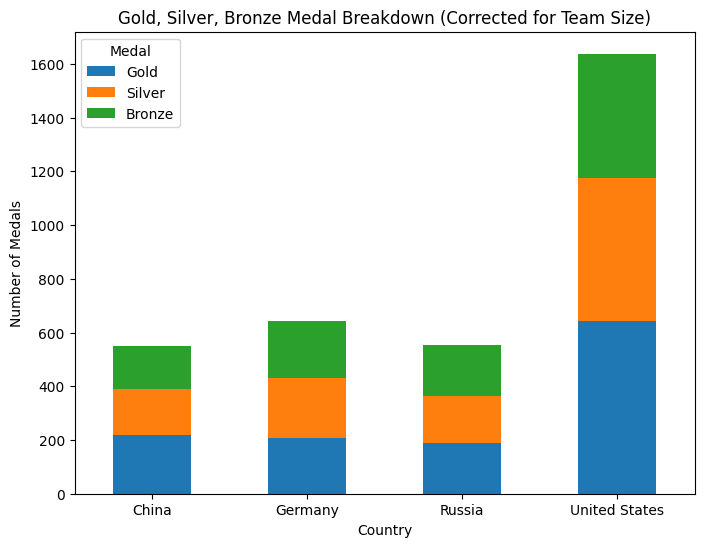

In [154]:
import matplotlib.pyplot as plt

# List of top countries (use correct names)
top_countries = ['United States', 'Russia', 'Germany', 'China']

# Filter for only these countries
row_mask_2 = medal_tally_agnostic['Team'].isin(top_countries)

# Pivot table for medal breakdown
medal_tally_specific = pd.pivot_table(
    medal_tally_agnostic[row_mask_2],
    index='Team',
    columns='Medal',
    values='Medal_Won_Corrected',
    aggfunc='sum',
    fill_value=0
).drop('DNW', axis=1)

# Order columns Gold → Silver → Bronze
medal_tally_specific = medal_tally_specific[['Gold', 'Silver', 'Bronze']]

# Plot stacked bar chart
medal_tally_specific.plot(
    kind='bar',
    stacked=True,
    figsize=(8,6),
    rot=0
)

plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.title('Gold, Silver, Bronze Medal Breakdown (Corrected for Team Size)')
plt.show()


### What sports are these countries best at?

So, what we want to find here are the events for which a country has the most proportion of gold medals from its own gold medal tally across the years.

In [158]:
# To get the sports, teams are best at, we now aggregate the medal_tally_agnostic dataframe as we did earlier.
best_team_sports = pd.pivot_table(medal_tally_agnostic[row_mask_2],
                                  index = ['Team', 'Event'],
                                  columns = 'Medal',
                                  values = 'Medal_Won_Corrected',
                                  aggfunc = 'sum',
                                  fill_value = 0).sort_values(['Team', 'Gold'], ascending = [True, False]).reset_index()

best_team_sports.drop(['Bronze', 'Silver', 'DNW'], axis = 1, inplace = True)
best_team_sports.columns = ['Team', 'Event', 'Gold_Medal_Count']

best_team_sports.groupby('Team').head(5)

,Team,Event,Gold_Medal_Count
0,China,Diving Women's Springboard,8.0
1,China,Table Tennis Women's Singles,8.0
2,China,Diving Women's Platform,7.0
3,China,Weightlifting Men's Lightweight,6.0
4,China,Diving Men's Springboard,5.0
402,Germany,"Equestrianism Mixed Dressage, Team",6.0
403,Germany,Luge Men's Singles,6.0
404,Germany,Luge Women's Singles,6.0
405,Germany,"Canoeing Men's Canadian Doubles, 1,000 metres",5.0
406,Germany,Rowing Women's Quadruple Sculls,5.0


We see that Chinese are good at diving - both men and women, Germans excel at equestrian sports, Russians likes to wrestle and Americans likes to swim.

## Do teams enjoy a home advantage?
home advantage: a phenomenon where a team does better when the olympics are being held in its own country than it fares in other countries.

To keep the comparison fair, we would compare the performance of these teams in the year when the olympics was held at their home vs one Olympics earlier.

#### Where was the olympics held in each of the years under consideration?

We see from the data that some cities have been captured incorrectly- <br>
1. Moskva should be 'Moscow'
2. Athina should be 'Athens'

Let's correct these cities before we proceed with any analysis

/tmp/ipython-input-2177669642.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olympics_complete_subset['City'].replace(['Athina', 'Moskva'], ['Athens', 'Moscow'], inplace = True)


Mapping each of these cities to their countries.

,Year,Country_Host
74,1964,Japan
11,1968,Mexico
12,1972,Germany
37,1976,Canada
70,1980,Russia
10,1984,USA
13,1988,South Korea
0,1992,Spain
3,1996,USA
2,2000,Australia


Excluding rows with Russia (1980) and USA (1984) because their biggest contender didn't participate in the olympics that time, we see that in **general team do better whilst playing at home!**

## Does GDP play a part in medal tallies?
GDP is a proxy for a country's resources. A higher GDP means more resources to allocate to sports!

/tmp/ipython-input-2057592082.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  correlation = medal_tally_gdp.loc[row_mask_5, ['GDP', 'Medal_Won_Corrected']].corr()['Medal_Won_Corrected'][0]


Text(4822277310494.587, 145.0, 'Correlation = 0.5267715536833076')

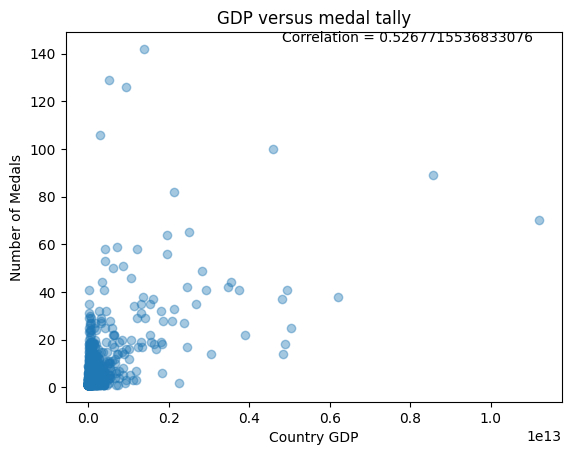

Analysis:

## Who are the most accomplished athletes in each sport?

Lets define accomplished athletes as those with a high medal to participation ratio. This means the average number of medals they win with each participation. Participation would be counted as the number of events that they participated in.

,Team,Name,Sport,Medal_Won
66110,South Korea,Kim Su-Nyeong,Archery,6
65767,South Korea,Ki Bo-Bae,Archery,4
66718,South Korea,Park Seong-Hyeon,Archery,4
16642,China,Zhang Juanjuan,Archery,3
39055,Italy,Marco Galiazzo,Archery,3


,Team,Name,Sport,Medal_Won,Event_Count,Medal_Per_Participation
12179,USA,Natalie Anne Coughlin (-Hall),Swimming,12,12,1.0
150,USA,"Frederick Carlton ""Carl"" Lewis",Athletics,10,10,1.0
4925,Germany,Isabelle Regina Werth,Equestrianism,10,10,1.0
12184,USA,"Gary Wayne Hall, Jr.",Swimming,10,10,1.0
5296,Italy,Maria Valentina Vezzali,Fencing,9,9,1.0
12191,Germany,"Kornelia Ender (-Matthes, -Grummt)",Swimming,8,8,1.0
12195,USA,"Donald Arthur ""Don"" Schollander",Swimming,8,8,1.0
12197,USA,Nathan Ghar-Jun Adrian,Swimming,8,8,1.0
4191,UK,Jason Francis Kenny,Cycling,7,7,1.0
4745,China,Wu Minxia,Diving,7,7,1.0


## Can we predict the medal tally of a country?

The exploration phase showed that the following factors affect a country's medal tally -
1. GDP
2. Contingent Size
3. Population
4. Home field advantage

##Modeling

_____ Regression

In [ ]:
import math

# take the log transforms for the variables
lin_model_data['Log_Population'] = np.log(lin_model_data['Population'])
lin_model_data['Log_GDP'] = np.log(lin_model_data['GDP'])

In [ ]:
# regression model
y, X = dmatrices('Medal_Won_Corrected ~ Log_GDP + Log_Population + Total_Athletes + Home_adv + GDP_per_capita',
                data = lin_model_data,
                return_type = 'dataframe')

model = sm.OLS(y, X)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Medal_Won_Corrected   R-squared:                       0.743
Model:                             OLS   Adj. R-squared:                  0.742
Method:                  Least Squares   F-statistic:                     951.9
Date:                 Mon, 01 Dec 2025   Prob (F-statistic):               0.00
Time:                         22:36:34   Log-Likelihood:                -5139.0
No. Observations:                 1651   AIC:                         1.029e+04
Df Residuals:                     1645   BIC:                         1.032e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.7337      1.796      7.091      0.000       9.211      16.256
Log_GDP           -0.8477      0.129     -6.572      0.000      -1.101      -0.595
Log_Population     0.2919      0.127      2.302      0.021       0.043       0.541
Total_Athletes     0.1225      0.002     54.973      0.000       0.118       0.127
Home_adv         -12.3672      1.992     -6.209      0.000     -16.274      -8.461
GDP_per_capita   4.72e-06   1.16e-05      0.405      0.685   -1.81e-05    2.76e-05
==============================================================================
Omnibus:                     1958.461   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           484235.582
Skew:                           5.755   Prob(JB):                         0.00
Kurtosis:                      86.107   Cond. No.                     2.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Findings

1. USA, Russia, Germany and China are medal tally leaders in the olympics if we count beginning in 1964. They have all sent varying number of athletes into events over time and have fared better with higher contingent sizes.

2.  


3.